## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

TensorFlow 2.x selected.


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Deep Learning/CNN/dog-breed/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd

In [9]:
labels = pd.read_csv('/content/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [10]:
print(labels['breed'].value_counts())


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64


### Get one-hot encodings of labels

In [11]:
import numpy as np

targets = pd.Series(labels['breed'])
one_hot = pd.get_dummies(targets, sparse=True)
one_hot_labels = np.asarray(one_hot)
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
num_channel=3

In [13]:
from tqdm import tqdm
import cv2
x_train=[]
y_train=[]

for f, img in tqdm(labels.values):# f as in format, jpg
    train_img = cv2.imread('./train/{}.jpg'.format(f),1)
    train_img_resize = cv2.resize(train_img, (img_rows, img_cols))
    x_train.append(train_img_resize)  
    y_train.append(img)

100%|██████████| 10222/10222 [00:29<00:00, 350.58it/s]


In [14]:
y_train[0]

'boston_bull'

In [15]:
x_train_array = np.array(x_train)
y_train_arrar = np.array(y_train)
print(x_train_array.shape)
print(y_train_arrar.shape)

(10222, 128, 128, 3)
(10222,)


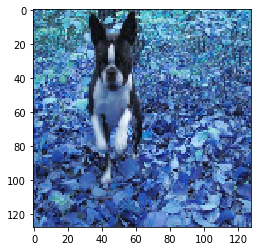

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [17]:
len(y_train)

10222

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [0]:
#x_train = np.asarray(x_train)
#y_train = pd.DataFrame(y_train)
#x_train.shape

In [0]:
#x_train = x_train.astype('float32')
x_train_nrm = x_train_array / 255

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
# Converting labels to one hot encoding

y_train_cat = np.array(pd.get_dummies(y_train))

In [22]:
y_train_cat[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [0]:
#x_train_data , x_test_data,y_train_data, y_test_data = train_test_split(x_train,y_train,test_size=0.1,random_state=10)
#y_train_data.shape
X_train, X_val, y_train, y_val = train_test_split(x_train_array, y_train_cat, test_size=0.2, random_state=42)

In [24]:
print ('shape of X_train_data', X_train.shape,  '\n ', ' shape of X_val_data ', X_val.shape)

shape of X_train_data (8177, 128, 128, 3) 
   shape of X_val_data  (2045, 128, 128, 3)


In [25]:
print ('shape of y_train_data', y_train.shape,  '\n ', ' shape of y_val_data ', y_val.shape)

shape of y_train_data (8177, 120) 
   shape of y_val_data  (2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [26]:
img_test = pd.read_csv('/content/sample_submission.csv')
test_img = img_test['id']
test_img.shape

(10357,)

In [27]:
img_test.shape

(10357, 121)

In [28]:
targets = pd.Series(img_test['id'])
one_hot = pd.get_dummies(targets, sparse=True)
y_test_feature = np.asarray(one_hot)
y_test_feature[0]

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

Run the below code to load the test image files in x_test_feature

In [29]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:29<00:00, 346.75it/s]


Normalize the test data and convert it into 4 dimensions

In [36]:
#from tensorflow.keras.utils import to_categorical

#x_test_feature = np.asarray(x_test_feature)
#x_test_feature = x_test_feature.astype('float32')
#x_test_feature = x_test_feature / 255
#x_test_feature.shape

x_test_array = np.array(x_test_feature)
y_test_array = np.array(y_test_feature)
print(x_test_array.shape)
print(y_test_array.shape)


(10357, 128, 128, 3)
(10357, 10357)


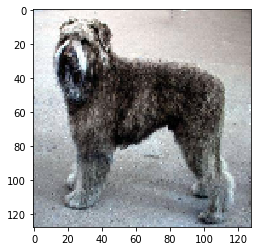

In [37]:
plt.imshow(x_test_feature[100])

In [0]:
x_test_nrm = x_test_array / 255

In [0]:
# Converting labels to one hot encoding

y_test_cat = np.array(pd.get_dummies(img_test['id']))

In [40]:
y_test_cat[0]

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Reshape, MaxPool2D, Flatten, Dense, Dropout,Activation, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#Clear any previous model from memory
tf.keras.backend.clear_session()
model = Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape=(128,128,3)))
model.add(Conv2D(256, (5, 5), padding='same', input_shape=(128,128,3)))
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(tf.keras.layers.Flatten())
# Output layer 
model.add(Dense(120,activation='softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 256)     19456     
_________________________________________________________________
activation (Activation)      (None, 128, 128, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 256)     590080    
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 256)     0         
_________________________________________________________________
flatten (Flatten)            (None, 4194304)           0         
_________________________________________________________________
dense (Dense)                (None, 120)               5

In [0]:
# CallBacks 
chkkpt = tf.keras.callbacks.ModelCheckpoint('./dog_class.h5', monitor='val_acc', save_best_only=True,)

In [49]:
history = model.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs=10,
          batch_size=128, callbacks=[chkkpt],workers=4,verbose = 1)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 68s 8ms/sample - loss: 9.7375 - accuracy: 0.0095 - val_loss: 4.7867 - val_accuracy: 0.0093
Epoch 2/10
8177/8177 [==============================] - 59s 7ms/sample - loss: 4.7859 - accuracy: 0.0100 - val_loss: 4.7860 - val_accuracy: 0.0176
Epoch 3/10
8177/8177 [==============================] - 59s 7ms/sample - loss: 4.7847 - accuracy: 0.0106 - val_loss: 4.7854 - val_accuracy: 0.0093
Epoch 4/10
8177/8177 [==============================] - 59s 7ms/sample - loss: 4.7836 - accuracy: 0.0109 - val_loss: 4.7849 - val_accuracy: 0.0108
Epoch 5/10
8177/8177 [==============================] - 59s 7ms/sample - loss: 4.7827 - accuracy: 0.0116 - val_loss: 4.7846 - val_accuracy: 0.0098
Epoch 6/10
8177/8177 [==============================] - 59s 7ms/sample - loss: 4.7818 - accuracy: 0.0105 - val_loss: 4.7842 - val_accuracy: 0.0098
Epoch 7/10
8177/8177 [==============================] - 59s 7ms/sample

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
img_size = 128
img_depth = 3

In [0]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#Build training generator. 
train_generator = img_generator.flow(X_train,y_train,batch_size=32)

In [0]:
#Build test generator
val_generator = img_generator.flow(X_val,y_val,batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('./dog_class.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [55]:
model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch= X_train.shape[0]//32,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = X_val.shape[0]//32, #Number of test images//batch_size
                    callbacks=[model_checkpoint],workers=4
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 255 steps, validate for 63 steps
Epoch 1/100
255/255 [==============================] - 59s 231ms/step - loss: 4.7797 - accuracy: 0.0119 - val_loss: 4.7836 - val_accuracy: 0.0094
Epoch 2/100
255/255 [==============================] - 57s 223ms/step - loss: 4.7784 - accuracy: 0.0119 - val_loss: 4.7835 - val_accuracy: 0.0094
Epoch 3/100
255/255 [==============================] - 58s 226ms/step - loss: 4.7778 - accuracy: 0.0119 - val_loss: 4.7838 - val_accuracy: 0.0094
Epoch 4/100
255/255 [==============================] - 58s 226ms/step - loss: 4.7774 - accuracy: 0.0119 - val_loss: 4.7838 - val_accuracy: 0.0094
Epoch 5/100
255/255 [==============================] - 58s 226ms/step - loss: 4.7770 - accuracy: 0.0119 - val_loss: 4.7841 - val_accuracy: 0.0094
Epoch 6/100
255/255 [==============================] - 58s 226ms/step - loss: 4.7770 - accuracy: 0.0119 - val_loss: 4.7842 - val_accuracy: 0.0094
Epoch 7/100
255/255 [==========

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= tf.keras.applications.VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [70]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x=base_model.output
x=Flatten()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(256,activation='relu')(x) #dense layer 2
preds=Dense(120,activation='softmax')(x)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
from tensorflow.keras.models import Model
model_vgg=Model(inputs=base_model.input,outputs=preds)

In [81]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model_vgg.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model_vgg.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

input_2
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
False
global_average_pooling2d_1
False
flatten_3
False
dense_7
True
dense_8
True
dense_9
True


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [82]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [0]:
chkpt_vgg = tf.keras.callbacks.ModelCheckpoint('./dog.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [88]:
history_vgg = model_vgg.fit(X_train,y_train,
                    epochs=50,validation_data=(X_val,y_val),
                    batch_size=128,
                    callbacks=[chkpt_vgg],workers=3)

Train on 8177 samples, validate on 2045 samples
Epoch 1/50
8177/8177 [==============================] - 7s 887us/sample - loss: 0.0026 - accuracy: 0.9991 - val_loss: 10.0084 - val_accuracy: 0.4020
Epoch 2/50
8177/8177 [==============================] - 7s 883us/sample - loss: 0.0025 - accuracy: 0.9991 - val_loss: 10.0019 - val_accuracy: 0.4020
Epoch 3/50
8177/8177 [==============================] - 7s 883us/sample - loss: 0.0021 - accuracy: 0.9991 - val_loss: 9.9902 - val_accuracy: 0.4039
Epoch 4/50
8177/8177 [==============================] - 7s 887us/sample - loss: 0.0024 - accuracy: 0.9989 - val_loss: 9.9908 - val_accuracy: 0.4034
Epoch 5/50
8177/8177 [==============================] - 7s 884us/sample - loss: 0.0029 - accuracy: 0.9988 - val_loss: 9.9849 - val_accuracy: 0.4034
Epoch 6/50
8177/8177 [==============================] - 7s 883us/sample - loss: 0.0023 - accuracy: 0.9991 - val_loss: 9.9907 - val_accuracy: 0.4034
Epoch 7/50
8177/8177 [==============================] - 7s 885